In [1]:
import torchvision.transforms.functional as F
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
image_dir_path = r'E:\middle_broken\middle_data'
image_list = os.listdir(image_dir_path)
image_list

['230513-07.10.11-B001_20241007190035_3_L_1.jpg',
 '230513-07.10.11-B001_20241007190557_3_R_1.jpg',
 '230513-07.10.11-B001_20241007190729_1_R_1.jpg',
 '230513-07.10.11-B001_20241007191102_4_L_1.jpg',
 '230513-07.10.11-B001_20241007191211_2_R_1.jpg',
 '230513-07.10.11-B001_20241007191635_1_L_1.jpg',
 '230513-07.10.11-B001_20241007191635_3_R_1.jpg',
 '230817-07.25.28-B002_20240828095726_2_L_1.jpg',
 '230817-07.25.28-B002_20240828095942_0_L_1.jpg',
 '230817-07.25.28-B002_20240828100810_3_R_1.jpg',
 '230817-07.26.27-B001_20240828103818_0_R_1.jpg',
 '230825-07.22.23-A008_20240902151451_0_L_1.jpg',
 '230825-07.22.23-A008_20240902151836_2_R_1.jpg',
 '230825-07.22.23-A008_20240902152010_2_L_1.jpg',
 '230825-07.22.23-A008_20240902152034_0_R_1.jpg',
 '230825-07.22.23-A008_20240902152045_2_R_1.jpg',
 '230825-07.22.23-A008_20240902152646_2_L_1.jpg',
 '230825-07.22.23-A008_20240902152721_0_R_1.jpg',
 '230825-07.22.23-A008_20240902154720_3_R_1.jpg',
 '230825-07.22.23-A008_20240902154720_4_R_1.jpg',


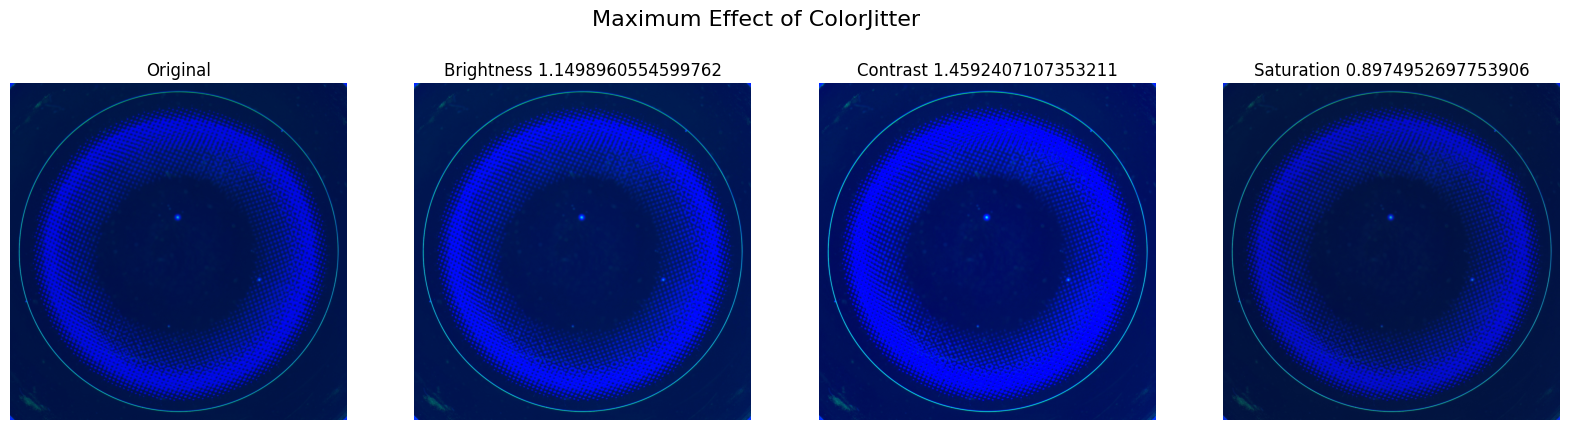

In [7]:
image_path = image_dir_path +'/'+ image_list[0]
image = Image.open(image_path).convert("RGB")

# 최대값 설정 (0.2의 최대 변화량)
brightness = 0.3  # 밝기: 원본 대비 20% 증가
contrast = 0.3    # 대비: 원본 대비 20% 증가
saturation = 0.3  # 채도: 원본 대비 20% 증가

brightness_factor = torch.randn(1).item() * brightness + 1
contrast_factor = torch.randn(1).item() * contrast + 1
saturation_factor = torch.randn(1).item() * saturation + 1

# 최대값 적용
brightness_image = F.adjust_brightness(image, brightness_factor)
contrast_image = F.adjust_contrast(image, contrast_factor)
saturation_image = F.adjust_saturation(image, saturation_factor)

# 시각화
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Maximum Effect of ColorJitter ", fontsize=16)

# 원본 이미지
axs[0].imshow(image)
axs[0].set_title("Original")
axs[0].axis('off')

# 밝기 최대값 적용
axs[1].imshow(brightness_image)
axs[1].set_title(f"Brightness {brightness_factor}")
axs[1].axis('off')

# 대비 최대값 적용
axs[2].imshow(contrast_image)
axs[2].set_title(f"Contrast {contrast_factor}")
axs[2].axis('off')

# 채도 최대값 적용
axs[3].imshow(saturation_image)
axs[3].set_title(f"Saturation {saturation_factor}")
axs[3].axis('off')

plt.show()

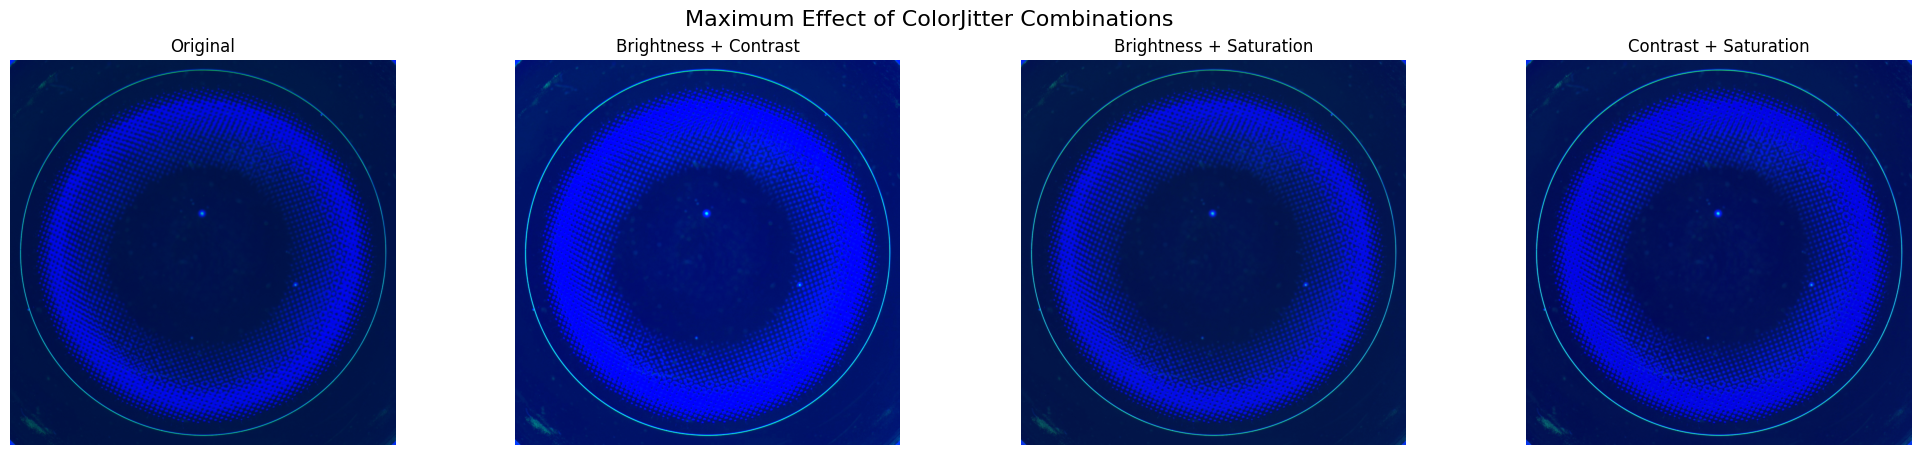

In [8]:

# 각 조합의 변환 적용
brightness_contrast_image = F.adjust_contrast(F.adjust_brightness(image, brightness_factor), contrast_factor)
brightness_saturation_image = F.adjust_saturation(F.adjust_brightness(image, brightness_factor), saturation_factor)
contrast_saturation_image = F.adjust_saturation(F.adjust_contrast(image, contrast_factor), saturation_factor)

# 시각화
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle("Maximum Effect of ColorJitter Combinations", fontsize=16)

# 원본 이미지
axs[0].imshow(image)
axs[0].set_title("Original")
axs[0].axis('off')

# 밝기 + 대비
axs[1].imshow(brightness_contrast_image)
axs[1].set_title("Brightness + Contrast")
axs[1].axis('off')

# 밝기 + 채도
axs[2].imshow(brightness_saturation_image)
axs[2].set_title("Brightness + Saturation")
axs[2].axis('off')

# 대비 + 채도
axs[3].imshow(contrast_saturation_image)
axs[3].set_title("Contrast + Saturation")
axs[3].axis('off')

plt.show()